In [15]:
import pandas as pd
import matplotlib.pyplot as plt

COLOR1 ='cadetblue'
COLOR2 ='salmon'

In [16]:
df = pd.read_csv('results.csv')

def add_total_features_int(df):
    # Rename the old columns to include 'average'
    df.rename(columns={
        'mine_board_states': 'average_mine_board_states',
        'their_board_states': 'average_their_board_states',
        'blank_board_states': 'average_blank_board_states'
    }, inplace=True)

    # Calculate the total number of features and add them to the dataframe, casting to int
    df['total_mine_board_states'] = (df['features_active'] * df['average_mine_board_states']).astype(int)
    df['total_their_board_states'] = (df['features_active'] * df['average_their_board_states']).astype(int)
    df['total_blank_board_states'] = (df['features_active'] * df['average_blank_board_states']).astype(int)

    # Add the new column 'total_mine_and_their' to the dataframe
    df['total_mine_and_their'] = df['total_mine_board_states'] + df['total_their_board_states']
    df['average_mine_and_their'] = df['average_mine_board_states'] + df['average_their_board_states']
    return df

# Use the function with the provided dataframe
df = add_total_features_int(df)
display(df)

# write to results.csv
df.to_csv('results_reformated.csv', index=False)

,features_active,average_mine_board_states,std_mine_board_states,average_their_board_states,std_their_board_states,average_blank_board_states,std_blank_board_states,average_moves_per_feature,std_average_moves_per_feature,avg_seq_lens,std_avg_seq_lens,row_name,total_mine_board_states,total_their_board_states,total_blank_board_states,total_mine_and_their,average_mine_and_their
0,242,0.037190,0.292222,1.111570,0.489508,4.421488,11.315353,14013.458678,2977.415822,11.362810,7.123133,L1E8,9,269,1070,278,1.148760
1,411,0.038929,0.346611,1.121655,0.603955,4.328467,11.205736,14413.136253,2077.194544,12.270560,9.264496,L1E16,15,461,1779,476,1.160584
2,273,0.194139,0.455775,1.091575,1.042522,4.139194,11.405402,14170.996337,2441.599133,16.493773,7.488614,L3E8,52,298,1130,350,1.285714
3,330,0.260606,0.565653,1.021212,0.942034,4.666667,12.097249,14061.160606,2741.141693,18.422424,9.700964,L3E16,86,337,1540,423,1.281818
4,158,0.348101,0.514686,0.841772,0.830755,5.664557,11.143830,14106.107595,2298.143925,16.457595,6.208134,L5E8,54,133,895,187,1.189873
5,311,0.536977,0.565130,0.710611,0.907197,8.308682,13.242284,13548.720257,3352.206685,14.345981,6.523589,L5E16,167,221,2584,388,1.247588


In [17]:
def plot_column_by_layer(df, column, title, filename, ylabel=None, color1=COLOR1, color2=COLOR2, ylimit=None):

    # Filter the dataframe for rows containing 'E8' and 'E16'
    df_e8 = df[df['row_name'].str.contains('E8')]
    df_e16 = df[df['row_name'].str.contains('E16')]

    # Extract labels based on unique layers present in the dataframe
    layers = sorted(set(label.split('E')[0] for label in df['row_name']))

    e8_values = [df_e8[df_e8['row_name'].str.contains(layer)][column].values[0] if not df_e8[df_e8['row_name'].str.contains(layer)].empty else 0 for layer in layers]
    e16_values = [df_e16[df_e16['row_name'].str.contains(layer)][column].values[0] if not df_e16[df_e16['row_name'].str.contains(layer)].empty else 0 for layer in layers]

    x = range(len(layers))  # the label locations
    width = 0.35  # the width of the bars

    plt.figure(figsize=(8, 5))

    plt.bar(x, e8_values, width, label='Expansion factor 8', color=color1)
    plt.bar([p + width for p in x], e16_values, width, label='Expansion factor 16', color=color2)

    ticks_size = 14
    title_size = 18
    label_size = 16

    plt.xlabel('Layer', fontsize=label_size)
    plt.ylabel(column.replace('_', ' ').title(), fontsize=label_size)
    if ylabel:
        plt.ylabel(ylabel, fontsize=label_size)
    plt.title(title, fontsize=title_size)
    plt.xticks([p + width / 2 for p in x], layers, fontsize=ticks_size)
    plt.yticks(fontsize=ticks_size)
    if ylimit:
        plt.ylim(top=ylimit)
    plt.legend(fontsize=ticks_size)
    plt.tight_layout()
    
    plt.savefig(f'pngs/{filename}.png')
    plt.show()
    

    # return the fig so it can be saved
    return plt

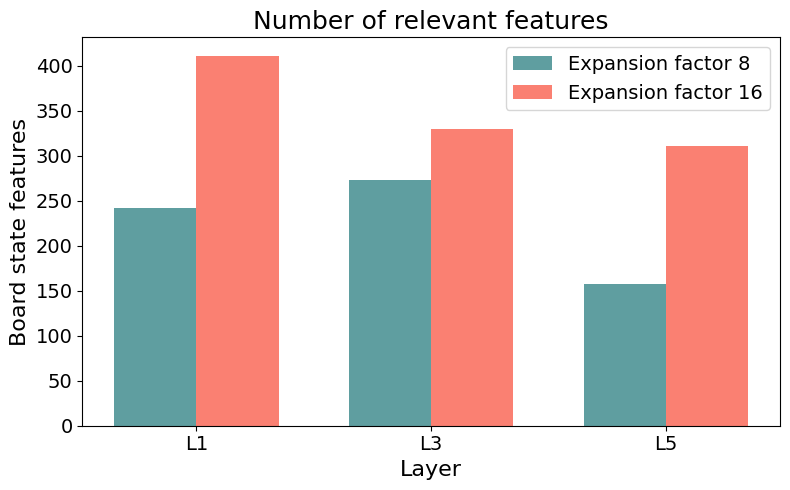

In [18]:
# Example usage of the function
plt = plot_column_by_layer(df, 'features_active', 'Number of relevant features', filename="board_state_features", ylabel="Board state features", color1=COLOR1, color2=COLOR2)

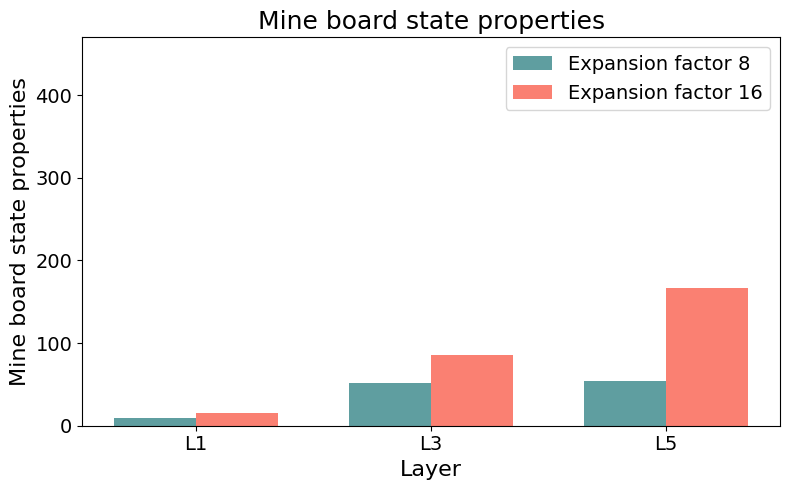

In [19]:
plt = plot_column_by_layer(df, 'total_mine_board_states', 'Mine board state properties', filename="mine_board_state_properties", ylabel="Mine board state properties", color1=COLOR1, color2=COLOR2, ylimit=470)

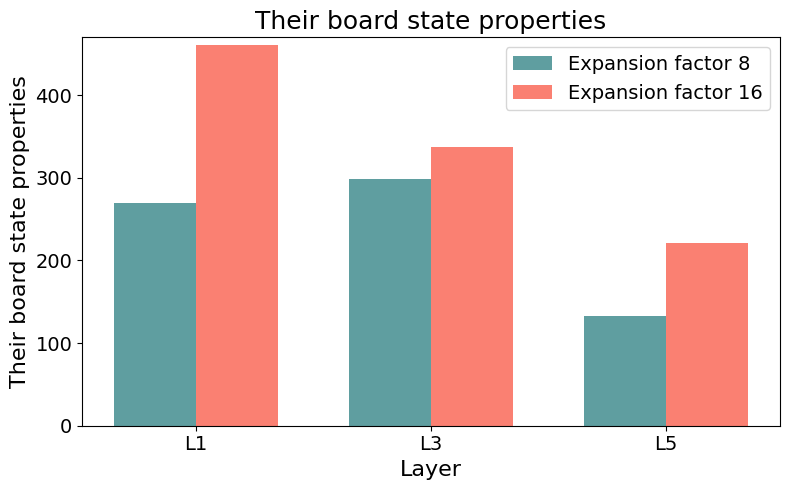

In [20]:
plt = plot_column_by_layer(df, 'total_their_board_states', 'Their board state properties', filename="their_board_state_properties", ylabel="Their board state properties", color1=COLOR1, color2=COLOR2, ylimit=470)